In [2]:
import monkdata as md
import dtree as dt
import pandas as pd
import numpy as np
import drawtree_qt5 as dwt

In [2]:
#task 1
MONK1_entropy = dt.entropy(md.monk1)
MONK2_entropy = dt.entropy(md.monk2)
MONK3_entropy = dt.entropy(md.monk3) 

print(f" Entropy 1 = {MONK1_entropy} \n Entropy 2 = {MONK2_entropy} \n Entropy 3 = {MONK3_entropy}")

 Entropy 1 = 1.0 
 Entropy 2 = 0.957117428264771 
 Entropy 3 = 0.9998061328047111


In [3]:
#task 2 
#If uniform distribution then p_i the same for all i => p_i = 1/N
#By definition entropy Ent = Sum_i -p_i log2(p_i)  
# = -Sum_N 1/N log2(1/N) = -N * 1/N log2(1/N)
#Ent = log2(N)
#It gives the maximum value for the entropy since it's not predictable 

#In the case of a non-unifrom distribution, such as a normal distribution where the p_i are different, 
# and points closer to the mean of the set have a higher probability to occur than others, the entropy
# becomes lower. Indeed the entropy is lowered as soon as the dataset becomes more predictable

#For example, the normal distribution with a small sigma as a really low entropy (centered peak values) whereas 
#normal distribution but larger sigma will have an higher entropy

In [4]:
#task 3

#Expected gain per attributes MONK1
info_gain_MONK1_a1 = dt.averageGain(md.monk1, md.attributes[0])
info_gain_MONK1_a2 = dt.averageGain(md.monk1, md.attributes[1])
info_gain_MONK1_a3 = dt.averageGain(md.monk1, md.attributes[2])
info_gain_MONK1_a4 = dt.averageGain(md.monk1, md.attributes[3])
info_gain_MONK1_a5 = dt.averageGain(md.monk1, md.attributes[4])
info_gain_MONK1_a6 = dt.averageGain(md.monk1, md.attributes[5])

#Expected gain per attributes MONK2
info_gain_MONK2_a1 = dt.averageGain(md.monk2, md.attributes[0])
info_gain_MONK2_a2 = dt.averageGain(md.monk2, md.attributes[1])
info_gain_MONK2_a3 = dt.averageGain(md.monk2, md.attributes[2])
info_gain_MONK2_a4 = dt.averageGain(md.monk2, md.attributes[3])
info_gain_MONK2_a5 = dt.averageGain(md.monk2, md.attributes[4])
info_gain_MONK2_a6 = dt.averageGain(md.monk2, md.attributes[5])

##Expected gain per attributes MONK3
info_gain_MONK3_a1 = dt.averageGain(md.monk3, md.attributes[0])
info_gain_MONK3_a2 = dt.averageGain(md.monk3, md.attributes[1])
info_gain_MONK3_a3 = dt.averageGain(md.monk3, md.attributes[2])
info_gain_MONK3_a4 = dt.averageGain(md.monk3, md.attributes[3])
info_gain_MONK3_a5 = dt.averageGain(md.monk3, md.attributes[4])
info_gain_MONK3_a6 = dt.averageGain(md.monk3, md.attributes[5])

print(f"MONK1 \n a1_MONK1= {info_gain_MONK1_a1} \n a2_MONK1= {info_gain_MONK1_a2} \n a3_MONK1= {info_gain_MONK1_a3} \n a4_MONK1= {info_gain_MONK1_a4} \n a5_MONK1= {info_gain_MONK1_a5} \n a6_MONK1= {info_gain_MONK1_a6} ")
 

MONK1 
 a1_MONK1= 0.07527255560831925 
 a2_MONK1= 0.005838429962909286 
 a3_MONK1= 0.00470756661729721 
 a4_MONK1= 0.02631169650768228 
 a5_MONK1= 0.28703074971578435 
 a6_MONK1= 0.0007578557158638421 


In [5]:
info_gain = {'MONK-1':[info_gain_MONK1_a1,info_gain_MONK1_a2,info_gain_MONK1_a3,info_gain_MONK1_a4,info_gain_MONK1_a5,info_gain_MONK1_a6],
'MONK-2':[info_gain_MONK2_a1,info_gain_MONK2_a2,info_gain_MONK2_a3,info_gain_MONK2_a4,info_gain_MONK2_a5,info_gain_MONK2_a6],
'MONK-3':[info_gain_MONK3_a1,info_gain_MONK3_a2,info_gain_MONK3_a3,info_gain_MONK3_a4,info_gain_MONK3_a5,info_gain_MONK3_a6]}

df = pd.DataFrame(data=info_gain)
df.transpose()

,0,1,2,3,4,5
MONK-1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
MONK-2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
MONK-3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


In [2]:
#For MONK1 and MONK2 the highest information gain isfor the attribute 5 so we shuld split this attribute at the root node
#For MONK3 the highest information gain is for the attribute 6 so it should be the attribute used for the root splitting

In [10]:
#task 4 

#If info_gain is maximised this implies that weighted sum of subsets entropy is minimised. Hence, by splitting root node with attribute that
# maximise the entropy gain, minimise entropy of subsequent subsets and then enhanced predictability of those   

In [6]:
#split into subsets
first_subset = dt.select(md.monk1,md.attributes[4],1)
second_subset = dt.select(md.monk1,md.attributes[4],2)
third_subset = dt.select(md.monk1,md.attributes[4],3)
fourth_subset = dt.select(md.monk1,md.attributes[4],4)

info_gain_first_subset = [0,0,0,0,0]
info_gain_second_subset = [0,0,0,0,0]
info_gain_third_subset = [0,0,0,0,0]
info_gain_fourth_subset = [0,0,0,0,0]

#calculate new info gain at next node
#first subset
info_gain_first_subset[0] = dt.averageGain(first_subset, md.attributes[0])
info_gain_first_subset[1] = dt.averageGain(first_subset, md.attributes[1])
info_gain_first_subset[2] = dt.averageGain(first_subset, md.attributes[2])
info_gain_first_subset[3] = dt.averageGain(first_subset, md.attributes[3])
info_gain_first_subset[4] = dt.averageGain(first_subset, md.attributes[5])

print(info_gain_first_subset)

#second subset 
info_gain_second_subset[0] = dt.averageGain(second_subset, md.attributes[0])
info_gain_second_subset[1] = dt.averageGain(second_subset, md.attributes[1])
info_gain_second_subset[2] = dt.averageGain(second_subset, md.attributes[2])
info_gain_second_subset[3] = dt.averageGain(second_subset, md.attributes[3])
info_gain_second_subset[4] = dt.averageGain(second_subset, md.attributes[5])

print(info_gain_second_subset)
#print(f"MONK1 \n a1_MONK1= {info_gain_MONK1_2_2_a1} \n a2_MONK1= {info_gain_MONK1_2_2_a2} \n a3_MONK1= {info_gain_MONK1_2_2_a3} \n a4_MONK1= {info_gain_MONK1_2_2_a4} \n a6_MONK1= {info_gain_MONK1_2_2_a6} ")


#third subset 
info_gain_third_subset[0] = dt.averageGain(third_subset, md.attributes[0])
info_gain_third_subset[1] = dt.averageGain(third_subset, md.attributes[1])
info_gain_third_subset[2] = dt.averageGain(third_subset, md.attributes[2])
info_gain_third_subset[3] = dt.averageGain(third_subset, md.attributes[3])
info_gain_third_subset[4] = dt.averageGain(third_subset, md.attributes[5])
 
print(info_gain_third_subset)
#print(f"MONK1 \n a1_MONK1= {info_gain_MONK1_2_3_a1} \n a2_MONK1= {info_gain_MONK1_2_3_a2} \n a3_MONK1= {info_gain_MONK1_2_3_a3} \n a4_MONK1= {info_gain_MONK1_2_3_a4} \n a6_MONK1= {info_gain_MONK1_2_3_a6} ")


#fourth subset 
info_gain_fourth_subset[0] = dt.averageGain(third_subset, md.attributes[0])
info_gain_fourth_subset[1] = dt.averageGain(third_subset, md.attributes[1])
info_gain_fourth_subset[2] = dt.averageGain(third_subset, md.attributes[2])
info_gain_fourth_subset[3] = dt.averageGain(third_subset, md.attributes[3])
info_gain_fourth_subset[4] = dt.averageGain(third_subset, md.attributes[5])

print(info_gain_fourth_subset)
#print(f"MONK1 \n a1_MONK1= {info_gain_MONK1_2_4_a1} \n a2_MONK1= {info_gain_MONK1_2_4_a2} \n a3_MONK1= {info_gain_MONK1_2_4_a3} \n a4_MONK1= {info_gain_MONK1_2_4_a4} \n a6_MONK1= {info_gain_MONK1_2_4_a6} ")
          
optimization_attribute_1 = max(info_gain_first_subset)
optimization_attribute_2 = max(info_gain_second_subset)
optimization_attribute_3 = max(info_gain_third_subset)
optimization_attribute_4 = max(info_gain_fourth_subset)

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.040216841609413634, 0.015063475072186083, 0.03727262736015946, 0.04889220262952931, 0.025807284723902146]
[0.03305510013455182, 0.002197183539100922, 0.017982293842278896, 0.01912275517747053, 0.04510853782483648]
[0.03305510013455182, 0.002197183539100922, 0.017982293842278896, 0.01912275517747053, 0.04510853782483648]


In [7]:
tree_monk1 = dt.buildTree(md.monk1, md.attributes)
tree_monk2 = dt.buildTree(md.monk2, md.attributes)
tree_monk3 = dt.buildTree(md.monk3, md.attributes)

print(tree_monk1)
print(tree_monk2)
print(tree_monk3)

dwt.drawTree(tree_monk1)



A5(+A4(A1(A2(+--)A2(-++)A2(--+))A2(-+-)A3(A1(A2(+--)+A2(-++))A2(--A1(--+))))A6(A4(A3(A1(A2(+--)A2(-+-)-)-)A1(A2(+--)--)-)A3(A4(A1(+--)A1(-++)+)A1(-A2(-+-)A2(--+))))A1(A2(+--)A2(-+-)A2(+-+)))
A5(A3(A6(-A1(-A2(--A4(--+))A2(-A4(-+-)-)))A4(A2(--A1(-+-))+A1(A2(-A6(-+)-)A2(A6(-+)++)+)))A3(A4(A2(-+-)A6(A1(--+)+)A1(A2(-++)++))A2(A4(++A1(+-A6(+-)))-A1(+A4(+--)-)))A3(A6(A1(-A4(-++)A4(--+))A2(+A1(+-A4(+--))A4(A1(-++)A1(+--)-)))A4(A2(A6(-+)A6(+-)A1(A6(-+)++))A1(A2(-+-)--)A1(A6(+-)--)))A2(A6(-A1(+-A4(++-)))A1(A4(-A3(-+)A3(A6(-+)A6(+-)))A3(+A6(+-))-)A3(A4(--+)-)))
A2(A5(++A4(A1(--+)++)-)A5(+A1(+A4(+-+)+)A3(A4(+A1(--+)A1(+--))+)-)A4(A5(--+A1(--+))--))


SystemExit: 0

C:\Users\lucie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3259: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
dwt.drawTree(tree_monk2)

SystemExit: 0

C:\Users\lucie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3259: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [16]:
dwt.drawTree(tree_monk3)

SystemExit: 0

C:\Users\lucie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3259: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
print(1-dt.check(tree_monk1, md.monk1test))
print(1-dt.check(tree_monk1, md.monk1))

print(1-dt.check(tree_monk2, md.monk2test))
print(1-dt.check(tree_monk2, md.monk2))

print(1-dt.check(tree_monk3, md.monk3test))
print(1-dt.check(tree_monk3, md.monk3))

0.17129629629629628
0.0
0.30787037037037035
0.0
0.05555555555555558
0.0


In [ ]:
#task 6 


In [9]:
import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

monk1train, monk1val = partition(md.monk1, 0.6)
monk2train, monk2val = partition(md.monk2, 0.6)
monk3train, monk3val = partition(md.monk3, 0.6)

tree_m1 = dt.buildTree(monk1train, md.attributes)
tree_m2 = dt.buildTree(monk2train, md.attributes)
tree_m3 = dt.buildTree(monk3train, md.attributes)

def find_best_tree(tree, dataset):
    pruned_tree_list = dt.allPruned(tree)
    best_tree = tree    
    for i in range(len(pruned_tree_list)):
        correct_pruned = dt.check(pruned_tree_list[i], dataset)
        correct_original = dt.check(best_tree, dataset)
        if correct_pruned>correct_original:
            best_tree = pruned_tree_list[i]
        else:
            break
    return best_tree


#tree_test = find_best_tree(tree_m1, monk1val)
#dwt.drawTree(tree_test)

def main(tree, dataset):
    original_tree = tree
    original_correct = dt.check(original_tree, dataset)
    
    new_tree = find_best_tree(original_tree, dataset)
    new_correct = dt.check(new_tree, dataset)

    while new_correct > original_correct:
        original_tree = new_tree
        test_tree = find_best_tree(new_tree, dataset)
        original_correct = dt.check(original_tree, dataset)
        new_correct = dt.check(test_tree, dataset)
    return original_tree

dwt.drawTree(main(tree_m1, monk1val))


SystemExit: 0

In [7]:
import math
fraction_list = [0.3,0.4,0.5,0.6,0.7,0.8]
check_0_0_m1 = []
check_0_1_m1 = []
check_0_2_m1 = []
check_0_3_m1 = []
check_0_4_m1 = []
check_0_5_m1 = []

check_0_0_m3 = []
check_0_1_m3 = []
check_0_2_m3 = []
check_0_3_m3 = []
check_0_4_m3 = []
check_0_5_m3 = []


for k in range(30):
    intern_list_1 = []
    intern_list_3 = []
    for i in range(len(fraction_list)):
        monk1train, monk1val = partition(md.monk1, fraction_list[i])
        monk3train, monk3val = partition(md.monk3, fraction_list[i])
        
        tree_m1 = dt.buildTree(monk1train, md.attributes)
        tree_m3 = dt.buildTree(monk3train, md.attributes)

        check_test_m1 = 1-dt.check(main(tree_m1, monk1val), md.monk1test)
        check_test_m3 = 1-dt.check(main(tree_m3, monk3val), md.monk3test)

        intern_list_1.append(check_test_m1)
        intern_list_3.append(check_test_m3)

    check_0_0_m1.append(intern_list_1[0])
    check_0_1_m1.append(intern_list_1[1])
    check_0_2_m1.append(intern_list_1[2])
    check_0_3_m1.append(intern_list_1[3])
    check_0_4_m1.append(intern_list_1[4])
    check_0_5_m1.append(intern_list_1[5])

    check_0_0_m3.append(intern_list_3[0])
    check_0_1_m3.append(intern_list_3[1])
    check_0_2_m3.append(intern_list_3[2])
    check_0_3_m3.append(intern_list_3[3])
    check_0_4_m3.append(intern_list_3[4])
    check_0_5_m3.append(intern_list_3[5])


    #those lists contain the fraction of errors








  Mean minimal error for MONK1:
[0.24733333333333332, 0.21793518518518518, 0.18463888888888888, 0.16509722222222223, 0.14424537037037038, 0.13969444444444445]

  Standard deviation minimal error for MONK1:
[0.04876455461314606, 0.05237449213660991, 0.052112952273149334, 0.05056737909637553, 0.04839178159705759, 0.04865068564733731]

  Mean minimal error for MONK3:
[0.11079166666666666, 0.09217129629629629, 0.08171296296296296, 0.07467592592592592, 0.07112962962962963, 0.06601851851851852]

  Standard deviation minimal error for MONK3:
[0.062482685714575374, 0.04755245358425438, 0.037696700681790984, 0.03257005684370711, 0.02915336690570374, 0.02169133636764499]


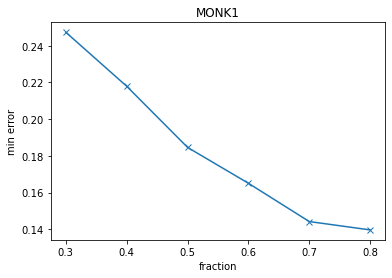

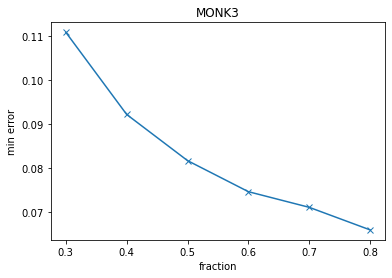

In [8]:
import random
from statistics import *
#from tkinter import N
import dtree as dt
import drawtree_qt5 as dwt
import matplotlib.pyplot as plt

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]




def main_2():
    fraction = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    precision = 500
    mean_min_error_MONK1 = []
    std_MONK1 = []
    mean_min_error_MONK3 = []
    std_MONK3 = []
    for fraction_ in fraction:
        min_error_MONK1 = []
        min_error_MONK3 = []
        for n in range(precision):
            monk1train, monk1val = partition(md.monk1, fraction_)
            monk3train, monk3val = partition(md.monk3, fraction_)
            tree_m1 = dt.buildTree(monk1train, md.attributes)
            tree_m3 = dt.buildTree(monk3train, md.attributes)
            min_error_MONK1.append(1-dt.check(main(tree_m1, monk1val), md.monk1test))
            min_error_MONK3.append(1-dt.check(main(tree_m3, monk3val), md.monk3test))
        mean_min_error_MONK1.append(mean(min_error_MONK1))
        mean_min_error_MONK3.append(mean(min_error_MONK3))
        std_MONK1.append(stdev(min_error_MONK1))
        std_MONK3.append(stdev(min_error_MONK3))
    
    print('\n  Mean minimal error for MONK1:')
    print(mean_min_error_MONK1)
    print('\n  Standard deviation minimal error for MONK1:')
    print(std_MONK1)
    print('\n  Mean minimal error for MONK3:')
    print(mean_min_error_MONK3)
    print('\n  Standard deviation minimal error for MONK3:')
    print(std_MONK3)

    plot1 = plt.figure(1)
    plt.plot(fraction, mean_min_error_MONK1, marker='x')
    plt.ylabel('min error')
    plt.xlabel('fraction')
    plt.title('MONK1')

    plot2 = plt.figure(2)
    plt.plot(fraction, mean_min_error_MONK3, marker='x')
    plt.ylabel('min error')
    plt.xlabel('fraction')
    plt.title('MONK3')

    plt.show()


main_2()